In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [6]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(1e-5, 1e-5),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

Using TensorFlow backend.


In [7]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.00001
hidden_nodes = 2000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 577us/step - loss: 0.7824 - acc: 0.3516 - val_loss: 0.6321 - val_acc: 0.7368
Epoch 2/1000
455/455 [==============================] - 0s 111us/step - loss: 0.6159 - acc: 0.6747 - val_loss: 0.5908 - val_acc: 0.4298
Epoch 3/1000
455/455 [==============================] - 0s 111us/step - loss: 0.5057 - acc: 0.7824 - val_loss: 0.4020 - val_acc: 0.9211
Epoch 4/1000
455/455 [==============================] - 0s 122us/step - loss: 0.4306 - acc: 0.8615 - val_loss: 0.3936 - val_acc: 0.8509
Epoch 5/1000
455/455 [==============================] - 0s 148us/step - loss: 0.4097 - acc: 0.8549 - val_loss: 0.3260 - val_acc: 0.9123
Epoch 6/1000
455/455 [==============================] - 0s 116us/step - loss: 0.3590 - acc: 0.8901 - val_loss: 0.3177 - val_acc: 0.9211
Epoch 7/1000
455/455 [==============================] - 0s 97us/step - loss: 0.3368 - acc: 0.9033 - val_loss: 0.3624 - val_acc: 0.8509
Epo

455/455 [==============================] - 0s 107us/step - loss: 0.2048 - acc: 0.9253 - val_loss: 0.1857 - val_acc: 0.9386
Epoch 61/1000
455/455 [==============================] - 0s 100us/step - loss: 0.2068 - acc: 0.9253 - val_loss: 0.1993 - val_acc: 0.9298
Epoch 62/1000
455/455 [==============================] - 0s 96us/step - loss: 0.2173 - acc: 0.9187 - val_loss: 0.1909 - val_acc: 0.9123
Epoch 63/1000
455/455 [==============================] - 0s 86us/step - loss: 0.2074 - acc: 0.9253 - val_loss: 0.1894 - val_acc: 0.9123
Epoch 64/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2044 - acc: 0.9209 - val_loss: 0.2175 - val_acc: 0.9035
Epoch 65/1000
455/455 [==============================] - 0s 137us/step - loss: 0.2107 - acc: 0.9165 - val_loss: 0.2022 - val_acc: 0.9123
Epoch 66/1000
455/455 [==============================] - 0s 110us/step - loss: 0.2031 - acc: 0.9231 - val_loss: 0.1913 - val_acc: 0.9123
Epoch 67/1000
455/455 [==============================] - 0

Epoch 120/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1917 - acc: 0.9297 - val_loss: 0.1772 - val_acc: 0.9298
Epoch 121/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2023 - acc: 0.9363 - val_loss: 0.1744 - val_acc: 0.9386
Epoch 122/1000
455/455 [==============================] - 0s 89us/step - loss: 0.2018 - acc: 0.9253 - val_loss: 0.2133 - val_acc: 0.8860
Epoch 123/1000
455/455 [==============================] - 0s 102us/step - loss: 0.2199 - acc: 0.9099 - val_loss: 0.1712 - val_acc: 0.9211
Epoch 124/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1897 - acc: 0.9275 - val_loss: 0.1793 - val_acc: 0.9123
Epoch 125/1000
455/455 [==============================] - 0s 104us/step - loss: 0.1916 - acc: 0.9231 - val_loss: 0.1713 - val_acc: 0.9298
Epoch 126/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1966 - acc: 0.9209 - val_loss: 0.1997 - val_acc: 0.9123
Epoch 127/1000
455/455 [==============

455/455 [==============================] - 0s 109us/step - loss: 0.2024 - acc: 0.9143 - val_loss: 0.1682 - val_acc: 0.9211
Epoch 180/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1891 - acc: 0.9275 - val_loss: 0.1805 - val_acc: 0.9123
Epoch 181/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1900 - acc: 0.9275 - val_loss: 0.1777 - val_acc: 0.9123
Epoch 182/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1936 - acc: 0.9385 - val_loss: 0.2199 - val_acc: 0.8684
Epoch 183/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1921 - acc: 0.9275 - val_loss: 0.1761 - val_acc: 0.9123
Epoch 184/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1860 - acc: 0.9341 - val_loss: 0.1733 - val_acc: 0.9211
Epoch 185/1000
455/455 [==============================] - 0s 123us/step - loss: 0.1846 - acc: 0.9253 - val_loss: 0.1665 - val_acc: 0.9211
Epoch 186/1000
455/455 [=============================

455/455 [==============================] - 0s 110us/step - loss: 0.1842 - acc: 0.9231 - val_loss: 0.1650 - val_acc: 0.9386
Epoch 239/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1936 - acc: 0.9253 - val_loss: 0.1646 - val_acc: 0.9211
Epoch 240/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1895 - acc: 0.9253 - val_loss: 0.1634 - val_acc: 0.9298
Epoch 241/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1804 - acc: 0.9297 - val_loss: 0.1648 - val_acc: 0.9211
Epoch 242/1000
455/455 [==============================] - 0s 83us/step - loss: 0.1881 - acc: 0.9253 - val_loss: 0.1678 - val_acc: 0.9298
Epoch 243/1000
455/455 [==============================] - 0s 120us/step - loss: 0.1819 - acc: 0.9253 - val_loss: 0.1635 - val_acc: 0.9211
Epoch 244/1000
455/455 [==============================] - 0s 77us/step - loss: 0.1885 - acc: 0.9275 - val_loss: 0.1706 - val_acc: 0.9298
Epoch 245/1000
455/455 [============================

Epoch 298/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1839 - acc: 0.9319 - val_loss: 0.1613 - val_acc: 0.9298
Epoch 299/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1829 - acc: 0.9209 - val_loss: 0.2247 - val_acc: 0.8772
Epoch 300/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1881 - acc: 0.9187 - val_loss: 0.1646 - val_acc: 0.9298
Epoch 301/1000
455/455 [==============================] - 0s 81us/step - loss: 0.1794 - acc: 0.9341 - val_loss: 0.1849 - val_acc: 0.9123
Epoch 302/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1838 - acc: 0.9341 - val_loss: 0.2176 - val_acc: 0.8684
Epoch 303/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1881 - acc: 0.9253 - val_loss: 0.1648 - val_acc: 0.9298
Epoch 304/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1822 - acc: 0.9341 - val_loss: 0.1601 - val_acc: 0.9298
Epoch 305/1000
455/455 [=================

455/455 [==============================] - 0s 114us/step - loss: 0.1760 - acc: 0.9341 - val_loss: 0.1599 - val_acc: 0.9211
Epoch 358/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1800 - acc: 0.9319 - val_loss: 0.1616 - val_acc: 0.9298
Epoch 359/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1757 - acc: 0.9275 - val_loss: 0.1592 - val_acc: 0.9211
Epoch 360/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1778 - acc: 0.9319 - val_loss: 0.1582 - val_acc: 0.9211
Epoch 361/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1800 - acc: 0.9275 - val_loss: 0.1579 - val_acc: 0.9298
Epoch 362/1000
455/455 [==============================] - 0s 102us/step - loss: 0.1782 - acc: 0.9297 - val_loss: 0.1578 - val_acc: 0.9298
Epoch 363/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1745 - acc: 0.9319 - val_loss: 0.2260 - val_acc: 0.8772
Epoch 364/1000
455/455 [============================

455/455 [==============================] - 0s 86us/step - loss: 0.1731 - acc: 0.9385 - val_loss: 0.1655 - val_acc: 0.9474
Epoch 417/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1877 - acc: 0.9297 - val_loss: 0.1639 - val_acc: 0.9386
Epoch 418/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1835 - acc: 0.9253 - val_loss: 0.1593 - val_acc: 0.9298
Epoch 419/1000
455/455 [==============================] - 0s 183us/step - loss: 0.1720 - acc: 0.9231 - val_loss: 0.1671 - val_acc: 0.9211
Epoch 420/1000
455/455 [==============================] - 0s 183us/step - loss: 0.1728 - acc: 0.9341 - val_loss: 0.1580 - val_acc: 0.9211
Epoch 421/1000
455/455 [==============================] - 0s 177us/step - loss: 0.1740 - acc: 0.9275 - val_loss: 0.1819 - val_acc: 0.9123
Epoch 422/1000
455/455 [==============================] - 0s 155us/step - loss: 0.1755 - acc: 0.9297 - val_loss: 0.1561 - val_acc: 0.9211
Epoch 423/1000
455/455 [============================

455/455 [==============================] - 0s 87us/step - loss: 0.1852 - acc: 0.9297 - val_loss: 0.1700 - val_acc: 0.9211
Epoch 476/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1774 - acc: 0.9297 - val_loss: 0.1593 - val_acc: 0.9298
Epoch 477/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1761 - acc: 0.9341 - val_loss: 0.1867 - val_acc: 0.8947
Epoch 478/1000
455/455 [==============================] - 0s 123us/step - loss: 0.1768 - acc: 0.9275 - val_loss: 0.2140 - val_acc: 0.8772
Epoch 479/1000
455/455 [==============================] - 0s 79us/step - loss: 0.1820 - acc: 0.9297 - val_loss: 0.1645 - val_acc: 0.9211
Epoch 480/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1701 - acc: 0.9319 - val_loss: 0.1534 - val_acc: 0.9211
Epoch 481/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1717 - acc: 0.9297 - val_loss: 0.1566 - val_acc: 0.9474
Epoch 482/1000
455/455 [==============================

455/455 [==============================] - 0s 114us/step - loss: 0.1739 - acc: 0.9363 - val_loss: 0.1531 - val_acc: 0.9211
Epoch 535/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1747 - acc: 0.9319 - val_loss: 0.1887 - val_acc: 0.8860
Epoch 536/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1737 - acc: 0.9407 - val_loss: 0.1693 - val_acc: 0.9211
Epoch 537/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1690 - acc: 0.9319 - val_loss: 0.1513 - val_acc: 0.9211
Epoch 538/1000
455/455 [==============================] - 0s 76us/step - loss: 0.1683 - acc: 0.9341 - val_loss: 0.1713 - val_acc: 0.9211
Epoch 539/1000
455/455 [==============================] - 0s 74us/step - loss: 0.1735 - acc: 0.9363 - val_loss: 0.1519 - val_acc: 0.9386
Epoch 540/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1678 - acc: 0.9319 - val_loss: 0.1694 - val_acc: 0.9211
Epoch 541/1000
455/455 [==============================]

Epoch 594/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1703 - acc: 0.9341 - val_loss: 0.1493 - val_acc: 0.9298
Epoch 595/1000
455/455 [==============================] - 0s 78us/step - loss: 0.1707 - acc: 0.9319 - val_loss: 0.1523 - val_acc: 0.9298
Epoch 596/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1682 - acc: 0.9341 - val_loss: 0.1553 - val_acc: 0.9298
Epoch 597/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1674 - acc: 0.9297 - val_loss: 0.1494 - val_acc: 0.9211
Epoch 598/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1734 - acc: 0.9253 - val_loss: 0.1544 - val_acc: 0.9474
Epoch 599/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1707 - acc: 0.9341 - val_loss: 0.1912 - val_acc: 0.8772
Epoch 600/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1702 - acc: 0.9363 - val_loss: 0.1561 - val_acc: 0.9298
Epoch 601/1000
455/455 [=================

455/455 [==============================] - 0s 90us/step - loss: 0.1669 - acc: 0.9341 - val_loss: 0.1488 - val_acc: 0.9386
Epoch 654/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1727 - acc: 0.9165 - val_loss: 0.1497 - val_acc: 0.9298
Epoch 655/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1692 - acc: 0.9319 - val_loss: 0.2070 - val_acc: 0.8772
Epoch 656/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1772 - acc: 0.9385 - val_loss: 0.1806 - val_acc: 0.9035
Epoch 657/1000
455/455 [==============================] - 0s 104us/step - loss: 0.1788 - acc: 0.9275 - val_loss: 0.1532 - val_acc: 0.9298
Epoch 658/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1652 - acc: 0.9341 - val_loss: 0.1479 - val_acc: 0.9386
Epoch 659/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1712 - acc: 0.9275 - val_loss: 0.1534 - val_acc: 0.9474
Epoch 660/1000
455/455 [=============================

455/455 [==============================] - 0s 81us/step - loss: 0.1702 - acc: 0.9165 - val_loss: 0.1532 - val_acc: 0.9298
Epoch 713/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1690 - acc: 0.9363 - val_loss: 0.1637 - val_acc: 0.9211
Epoch 714/1000
455/455 [==============================] - 0s 102us/step - loss: 0.1689 - acc: 0.9319 - val_loss: 0.1473 - val_acc: 0.9298
Epoch 715/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1719 - acc: 0.9297 - val_loss: 0.1616 - val_acc: 0.9211
Epoch 716/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1681 - acc: 0.9385 - val_loss: 0.1522 - val_acc: 0.9298
Epoch 717/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1644 - acc: 0.9319 - val_loss: 0.1471 - val_acc: 0.9298
Epoch 718/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1670 - acc: 0.9407 - val_loss: 0.1459 - val_acc: 0.9211
Epoch 719/1000
455/455 [=============================

Epoch 772/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1689 - acc: 0.9297 - val_loss: 0.1599 - val_acc: 0.9211
Epoch 773/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1685 - acc: 0.9385 - val_loss: 0.1871 - val_acc: 0.8772
Epoch 774/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1780 - acc: 0.9231 - val_loss: 0.1675 - val_acc: 0.9211
Epoch 775/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1638 - acc: 0.9451 - val_loss: 0.1443 - val_acc: 0.9386
Epoch 776/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1629 - acc: 0.9385 - val_loss: 0.1695 - val_acc: 0.9123
Epoch 777/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1622 - acc: 0.9363 - val_loss: 0.1444 - val_acc: 0.9211
Epoch 778/1000
455/455 [==============================] - 0s 82us/step - loss: 0.1605 - acc: 0.9429 - val_loss: 0.1666 - val_acc: 0.9211
Epoch 779/1000
455/455 [===============

455/455 [==============================] - 0s 222us/step - loss: 0.1774 - acc: 0.9165 - val_loss: 0.1460 - val_acc: 0.9298
Epoch 832/1000
455/455 [==============================] - 0s 175us/step - loss: 0.1635 - acc: 0.9385 - val_loss: 0.1452 - val_acc: 0.9298
Epoch 833/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1626 - acc: 0.9385 - val_loss: 0.1463 - val_acc: 0.9298
Epoch 834/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1712 - acc: 0.9275 - val_loss: 0.1847 - val_acc: 0.8772
Epoch 835/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1720 - acc: 0.9341 - val_loss: 0.1698 - val_acc: 0.9211
Epoch 836/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1671 - acc: 0.9319 - val_loss: 0.1428 - val_acc: 0.9211
Epoch 837/1000
455/455 [==============================] - 0s 87us/step - loss: 0.1683 - acc: 0.9429 - val_loss: 0.1494 - val_acc: 0.9474
Epoch 838/1000
455/455 [=============================

Epoch 891/1000
455/455 [==============================] - 0s 127us/step - loss: 0.1658 - acc: 0.9363 - val_loss: 0.1463 - val_acc: 0.9298
Epoch 892/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1630 - acc: 0.9297 - val_loss: 0.1576 - val_acc: 0.9211
Epoch 893/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1658 - acc: 0.9363 - val_loss: 0.1506 - val_acc: 0.9298
Epoch 894/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1601 - acc: 0.9429 - val_loss: 0.1482 - val_acc: 0.9298
Epoch 895/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1649 - acc: 0.9297 - val_loss: 0.1459 - val_acc: 0.9474
Epoch 896/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1629 - acc: 0.9385 - val_loss: 0.1704 - val_acc: 0.9211
Epoch 897/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1624 - acc: 0.9363 - val_loss: 0.1418 - val_acc: 0.9386
Epoch 898/1000
455/455 [================

455/455 [==============================] - 0s 113us/step - loss: 0.1657 - acc: 0.9319 - val_loss: 0.1402 - val_acc: 0.9298
Epoch 951/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1596 - acc: 0.9363 - val_loss: 0.1695 - val_acc: 0.9211
Epoch 952/1000
455/455 [==============================] - 0s 152us/step - loss: 0.1549 - acc: 0.9319 - val_loss: 0.1434 - val_acc: 0.9474
Epoch 953/1000
455/455 [==============================] - 0s 186us/step - loss: 0.1656 - acc: 0.9341 - val_loss: 0.1422 - val_acc: 0.9298
Epoch 954/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1604 - acc: 0.9341 - val_loss: 0.1875 - val_acc: 0.8772
Epoch 955/1000
455/455 [==============================] - 0s 84us/step - loss: 0.1709 - acc: 0.9297 - val_loss: 0.1885 - val_acc: 0.8772
Epoch 956/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1740 - acc: 0.9363 - val_loss: 0.1693 - val_acc: 0.9211
Epoch 957/1000
455/455 [===========================

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [9]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.945
best validation accuracy: 0.947


# Weight analysis

In [10]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return l.shape[0] - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(0)

# Graphics

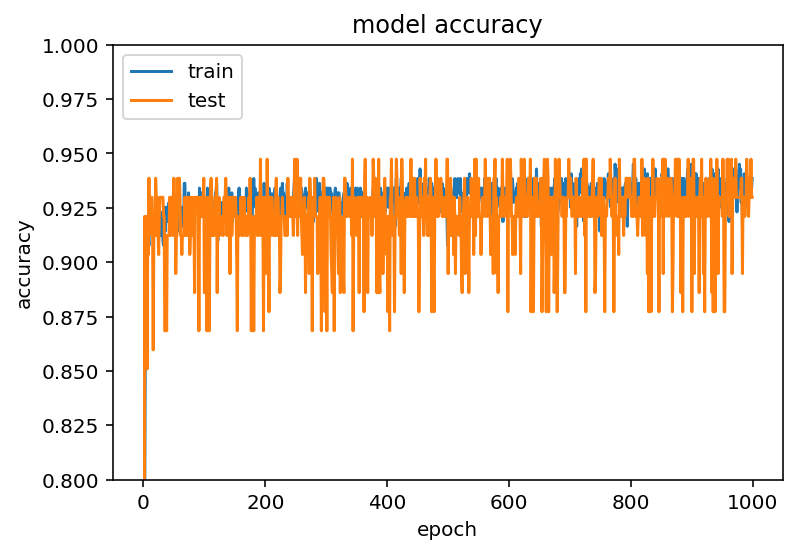

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8, 1.0])
plt.show()

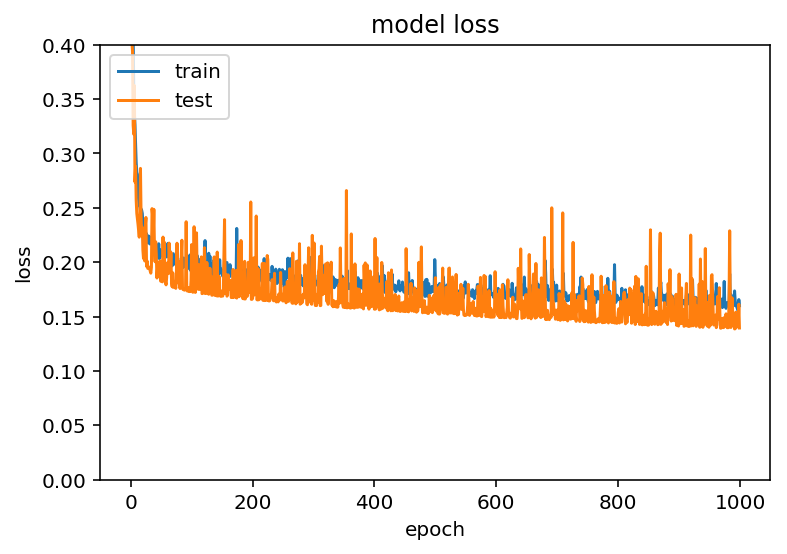

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.0, 0.4])
plt.show()

In [13]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

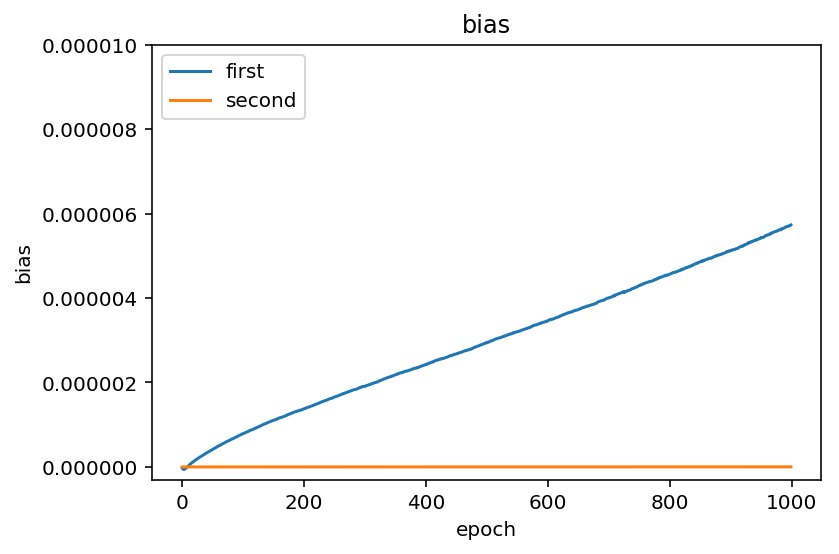

In [30]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='upper left')
plt.ylim([-3e-7, 1e-5])
plt.show()

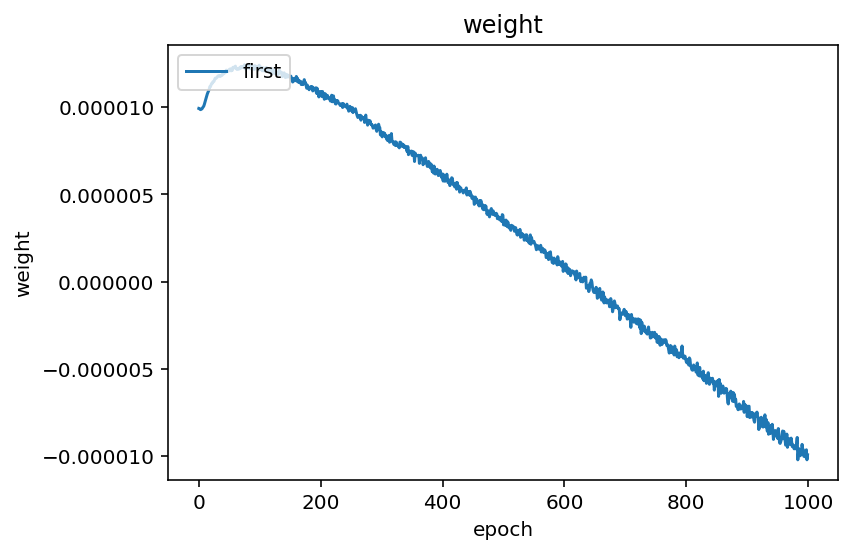

In [15]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

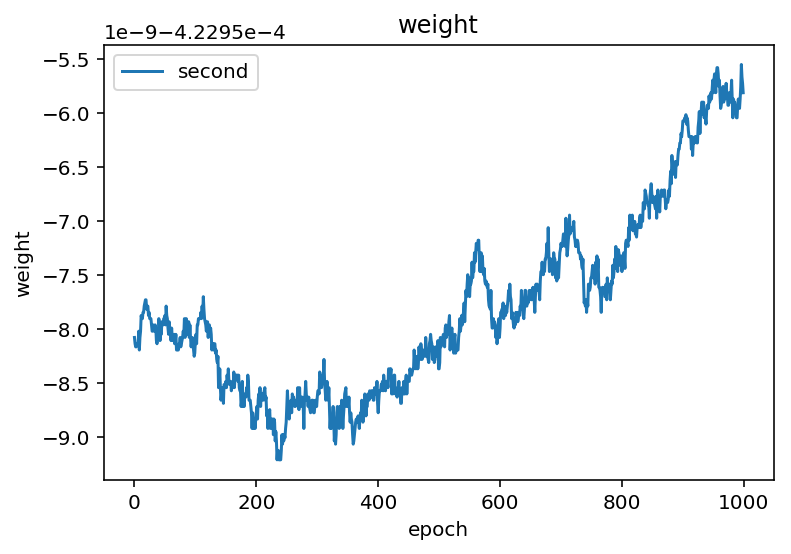

In [16]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

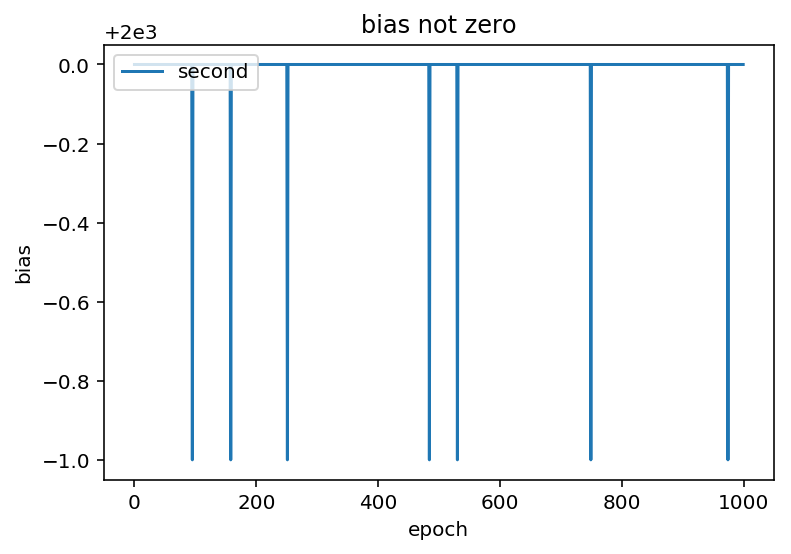

In [17]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

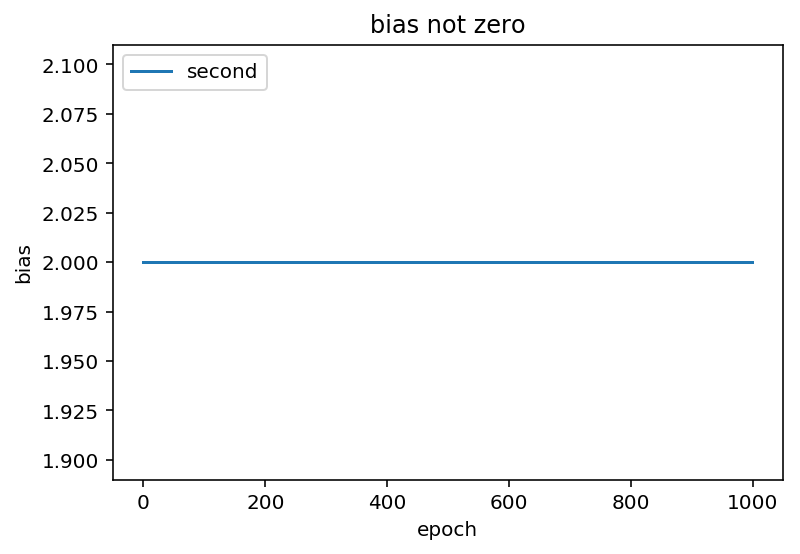

In [18]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

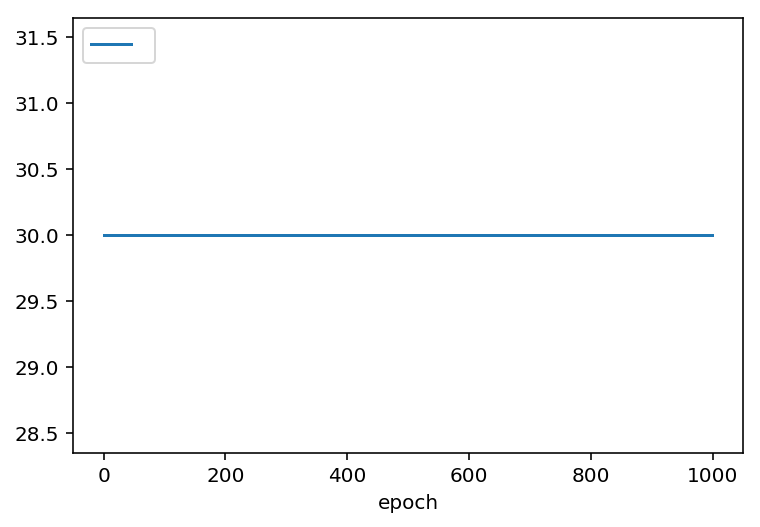

In [19]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

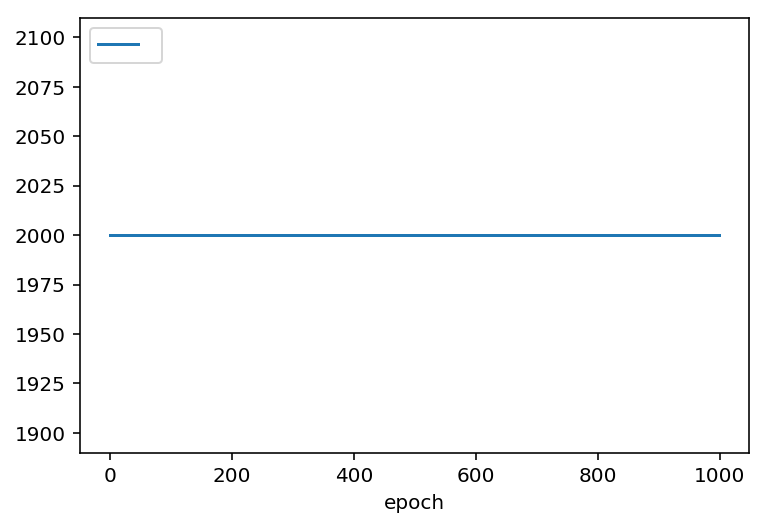

In [20]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

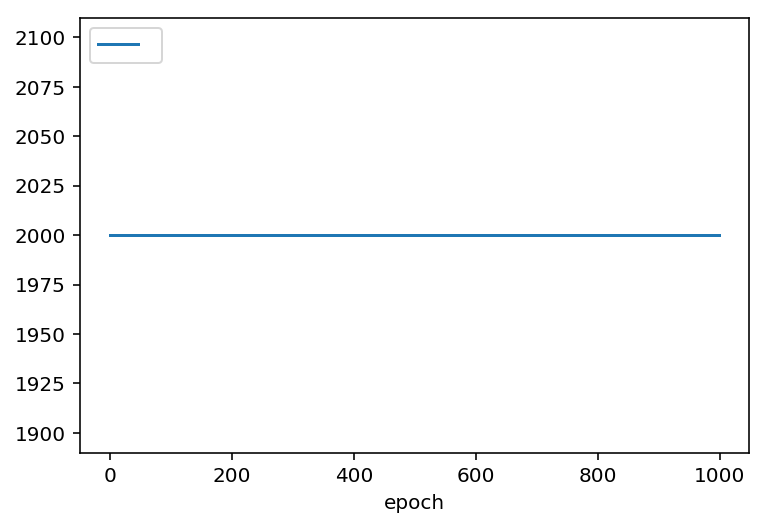

In [21]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

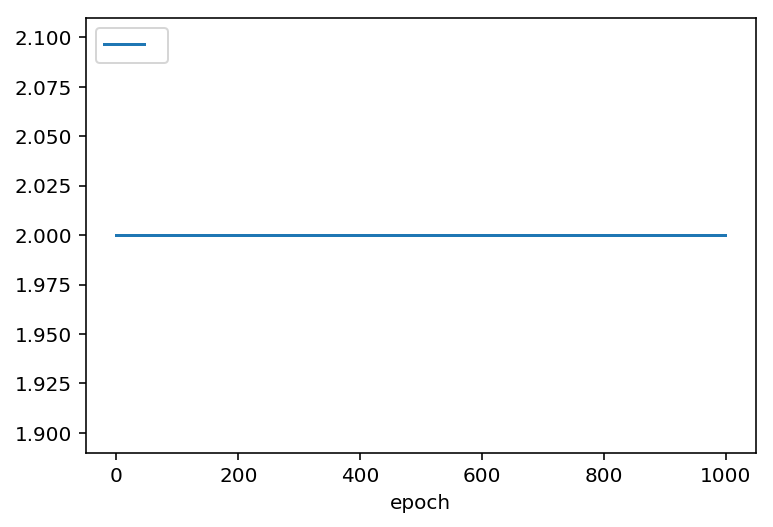

In [22]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()